# Quantium Virtual Internship - Retail Strategy and Analytics - Task 2

## Load required libraries and datasets

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from datetime import datetime, timedelta
import scipy as scipy

%matplotlib inline

In [117]:
data = pd.read_csv('QVI_data.csv')

 ## Select control stores


The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

<br>
Let's first create the metrics of interest and filter to stores that are present throughout the pre-trial period.

#### Calculate these measures over time for each store

#### Add a new month ID column in the data with the format yyyymm.

In [118]:
#Convert date column to type datetime 
data['DATE'] = pd.to_datetime(data['DATE'])

#Create a separate column for YYYYMM format
data['YEARMONTH'] = data['DATE'].dt.strftime('%Y%m')

data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [119]:
data['LYLTY_CARD_NBR'].nunique()

72636

Next, we define the measure calculations to use during the analysis.

#### For each store and month calculate total sales, number of customers, transactions per customer, chips per customer and the average price per unit.

In [120]:
#Create a dataset of each store's monthly total sales, number of 
#customers, transactions per customer, chips per customer and the
#average price per unit.
measureOverTime = data.groupby(['STORE_NBR','YEARMONTH'])['TOT_SALES'].sum().to_frame()

measureOverTime['N_CUSTOMERS'] = data.groupby(['STORE_NBR','YEARMONTH'])['LYLTY_CARD_NBR'].nunique()

measureOverTime['N_TXN_PER_CUSTOMER'] = data.groupby(['STORE_NBR','YEARMONTH'])['TXN_ID'].nunique() / measureOverTime['N_CUSTOMERS']

measureOverTime['N_CHIPS_PER_TXN'] = data.groupby(['STORE_NBR','YEARMONTH'])['PROD_QTY'].sum() / data.groupby(['STORE_NBR','YEARMONTH'])['TXN_ID'].nunique()

measureOverTime['AVG_UNIT_PRICE'] = measureOverTime['TOT_SALES'] / data.groupby(['STORE_NBR','YEARMONTH'])['PROD_QTY'].sum()

measureOverTime = measureOverTime.reset_index()

measureOverTime['YEARMONTH'] = pd.to_datetime(measureOverTime['YEARMONTH'], format='%Y%m')

measureOverTime

,STORE_NBR,YEARMONTH,TOT_SALES,N_CUSTOMERS,N_TXN_PER_CUSTOMER,N_CHIPS_PER_TXN,AVG_UNIT_PRICE
0,1,2018-07-01,206.9,49,1.061224,1.192308,3.337097
1,1,2018-08-01,176.1,42,1.023810,1.255814,3.261111
2,1,2018-09-01,278.8,59,1.050847,1.209677,3.717333
3,1,2018-10-01,188.1,44,1.022727,1.288889,3.243103
4,1,2018-11-01,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,2019-02-01,395.5,45,1.066667,1.895833,4.346154
3165,272,2019-03-01,442.3,50,1.060000,1.905660,4.379208
3166,272,2019-04-01,445.1,54,1.018519,1.909091,4.239048
3167,272,2019-05-01,314.6,34,1.176471,1.775000,4.430986


Now, let us look into pre-trial period and stores with full observation periods.

#### Filter to the pre-trial period and stores with full observation periods

In [121]:
#Find list of stores with full observations periods
storesOpsPeriod = measureOverTime.reset_index().groupby('STORE_NBR')['YEARMONTH'].nunique().to_frame()

storesWithFullObs = storesOpsPeriod.YEARMONTH[storesOpsPeriod.YEARMONTH == 12].index.tolist()

preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < pd.Timestamp(2019,2,1)) & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]

preTrialMeasures = preTrialMeasures.groupby(['STORE_NBR','YEARMONTH']).sum()

preTrialMeasures

TOT_SALES  N_CUSTOMERS  N_TXN_PER_CUSTOMER  \
STORE_NBR YEARMONTH                                                
1         2018-07-01      206.9           49            1.061224   
          2018-08-01      176.1           42            1.023810   
          2018-09-01      278.8           59            1.050847   
          2018-10-01      188.1           44            1.022727   
          2018-11-01      192.6           46            1.021739   
...                         ...          ...                 ...   
272       2018-09-01      304.7           32            1.125000   
          2018-10-01      430.6           44            1.136364   
          2018-11-01      376.2           41            1.097561   
          2018-12-01      403.9           47            1.000000   
          2019-01-01      423.0           46            1.086957   

                      N_CHIPS_PER_TXN  AVG_UNIT_PRICE  
STORE_NBR YEARMONTH                                    
1         2018-07-01         1.192308        3.337097  
          2018-08-01         1.255814        3.261111  
          2018-09-01         1.209677        3.717333  
          2018-10-01         1.288889        3.243103  
          2018-11-01         1.212766        3.378947  
...                               ...             ...  
272       2018-09-01         1.972222        4.291549  
          2018-10-01         1.980000        4.349495  
          2018-11-01         1.933333        4.324138  
          2018-12-01         1.893617        4.538202  
          2019-01-01         1.920000        4.406250  

[1820 rows x 5 columns]

In [122]:
preTrialMeasures.query('STORE_NBR == 77')

TOT_SALES  N_CUSTOMERS  N_TXN_PER_CUSTOMER  \
STORE_NBR YEARMONTH                                                
77        2018-07-01      296.8           51            1.078431   
          2018-08-01      255.5           47            1.021277   
          2018-09-01      225.2           42            1.047619   
          2018-10-01      204.5           37            1.027027   
          2018-11-01      245.3           41            1.073171   
          2018-12-01      267.3           46            1.043478   
          2019-01-01      204.4           35            1.114286   

                      N_CHIPS_PER_TXN  AVG_UNIT_PRICE  
STORE_NBR YEARMONTH                                    
77        2018-07-01         1.527273        3.533333  
          2018-08-01         1.541667        3.452703  
          2018-09-01         1.590909        3.217143  
          2018-10-01         1.368421        3.932692  
          2018-11-01         1.522727        3.661194  
          2018-12-01         1.500000        3.712500  
          2019-01-01         1.666667        3.144615

Now we need to work out a way of ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store.
<br><br>
Let's write a function for this so that we don't have to calculate this for each trial store and control store pair.

#### Create a function to calculate correlation for a measure, looping through each control store.

Let's define `inputTable` as a metric table with potential comparison stores, `metricCol` as the store metric used to calculate correlation on, and `storeComparison` as the store number of the trial store.

In [123]:
#Calculate the correlation of all the stores with the trial store
def calculateCorrelation(inputTable, metricCol, storeComparison):
    #Table to store the correlation data
    calcCorrTable = pd.DataFrame(columns = {'Store1','Store2','corrMeasure'})
    
    #List of stores to be compared against trial store
    storeNumbers = inputTable.reset_index()['STORE_NBR'].unique()
    
    #Loop through each store and find its correlation with 
    #trial store based on the metric chosen
    for i in storeNumbers:
        colData1 = inputTable.query(f'STORE_NBR == {storeComparison}').reset_index()[metricCol]
        
        colData2 = inputTable.query(f'STORE_NBR == {i}').reset_index()[metricCol]
        
        newRow = {'Store1':storeComparison,
                  'Store2':i,
                  'corrMeasure':colData1.corr(colData2, method = 'kendall')
                 }
        
        calcCorrTable = calcCorrTable.append(newRow, ignore_index = True)
        
    return calcCorrTable

Apart from correlation, we can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance.

#### Create a function to calculate a standardised magnitude distance for a measure

In [124]:
#Calculate the correlation of all the stores with the trial store
def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    #Create table to store the correlation data
    calcDistTable = pd.DataFrame(columns = {'Store1','Store2','YEARMONTH','measure'})
    
    #List of stores to be compared against trial store
    storeNumbers = inputTable.reset_index()['STORE_NBR'].unique()
    
    #Loop through each store and find its monthly absolute 
    #difference with trial store based on metric chosen
    for i in storeNumbers:
        colData1 = inputTable.query(f'STORE_NBR == {storeComparison}').reset_index()[metricCol]
        
        colData2 = inputTable.query(f'STORE_NBR == {i}').reset_index()[metricCol]
        
        newRow = {'Store1':storeComparison,
                  'Store2':i,
                  'YEARMONTH':inputTable.query(f'STORE_NBR == {storeComparison}').reset_index()['YEARMONTH'],
                  'measure': abs(colData1 - colData2),
                 }
        
        calcDistTable = calcDistTable.append(newRow, ignore_index = True)
    
    calcDistTable = calcDistTable[['Store1','Store2','YEARMONTH','measure']].apply(pd.Series.explode).reset_index()
    
    minMaxDist = calcDistTable[['Store2','YEARMONTH']]
    minMaxDist = minMaxDist.assign(minDist = calcDistTable['measure'].min())
    
    minMaxDist = minMaxDist.assign(maxDist = calcDistTable['measure'].max())
    
    
    distTable = pd.merge(calcDistTable,minMaxDist,on = ['Store2','YEARMONTH'])
    
    distTable = distTable.assign(magnitudeMeasure = 1 - (distTable['measure'] - distTable['minDist']) / (distTable['maxDist'] - distTable['minDist']))
    
    finalDistTable = distTable[['Store1','Store2','magnitudeMeasure']].astype(float)
    
    finalDistTable = finalDistTable.groupby(['Store1','Store2']).mean().reset_index()

    return finalDistTable

Now let's use the functions to find the control stores! We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

## Trial store 77

#### Use the function to calculate correlations against store 77 using total sales and number of customers.

In [125]:
#Calculate correlation against store 77 using total sales and number 
#of customers
trialStore = 77
corrNSales = calculateCorrelation(preTrialMeasures, 'TOT_SALES', trialStore)

corrNCustomers = calculateCorrelation(preTrialMeasures, 'N_CUSTOMERS', trialStore)

corrNCustomers

,corrMeasure,Store1,Store2
0,0.292770,77.0,1.0
1,-0.514344,77.0,2.0
2,0.650814,77.0,3.0
3,-0.097590,77.0,4.0
4,0.238095,77.0,5.0
...,...,...,...
255,0.333333,77.0,268.0
256,-0.333333,77.0,269.0
257,-0.052926,77.0,270.0
258,0.000000,77.0,271.0


#### Use the functions for calculating magnitude.

In [126]:
#Calculate magnitude between stores and trial stores using total
#sales and number of customers
magnitudeNSales = calculateMagnitudeDistance(preTrialMeasures, 'TOT_SALES', trialStore)

magnitudeNCustomers = calculateMagnitudeDistance(preTrialMeasures, 'N_CUSTOMERS', trialStore)


We'll need to combine the all the scores calculated using our function to create a composite score to rank on.
<br><br>
Let's take a simple average of the correlation and magnitude scores for each driver. Note that if we consider it more important for the trend of the drivers to be similar, we can increase the weight of the correlation score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the drivers to be more important, we can lower the weight of the correlation score.


#### Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.

In [127]:
#Calculate and tabulate combined score of total sales composed of
#correlation and magnitude
corrWeight = 0.5
scoreNSales = pd.merge(corrNSales, magnitudeNSales, on = ['Store1','Store2'])

scoreNSales = scoreNSales.assign(scoreNSales = corrWeight * scoreNSales['corrMeasure'] + (1 - corrWeight) * scoreNSales['magnitudeMeasure'])

scoreNSales

,corrMeasure,Store1,Store2,magnitudeMeasure,scoreNSales
0,0.333333,77.0,1.0,0.956978,0.645155
1,-0.238095,77.0,2.0,0.941464,0.351684
2,0.428571,77.0,3.0,0.402104,0.415338
3,-0.238095,77.0,4.0,0.237849,-0.000123
4,-0.142857,77.0,5.0,0.585403,0.221273
...,...,...,...,...,...
255,0.238095,77.0,268.0,0.964042,0.601069
256,-0.142857,77.0,269.0,0.490514,0.173829
257,0.142857,77.0,270.0,0.487082,0.314970
258,0.238095,77.0,271.0,0.582797,0.410446


In [128]:
#Calculate and tabulate combined score of number of customers 
#composed of correlation and magnitude
scoreNCustomers = pd.merge(corrNCustomers, magnitudeNCustomers, on = ['Store1','Store2'])

scoreNCustomers = scoreNCustomers.assign(scoreNCust = corrWeight * scoreNCustomers['corrMeasure'] + (1 - corrWeight) * scoreNCustomers['magnitudeMeasure'])

scoreNCustomers

,corrMeasure,Store1,Store2,magnitudeMeasure,scoreNCust
0,0.292770,77.0,1.0,0.945055,0.618912
1,-0.514344,77.0,2.0,0.929945,0.207800
2,0.650814,77.0,3.0,0.388736,0.519775
3,-0.097590,77.0,4.0,0.244505,0.073458
4,0.238095,77.0,5.0,0.516484,0.377289
...,...,...,...,...,...
255,0.333333,77.0,268.0,0.943681,0.638507
256,-0.333333,77.0,269.0,0.385989,0.026328
257,-0.052926,77.0,270.0,0.402473,0.174773
258,0.000000,77.0,271.0,0.515110,0.257555


Now we have a score for each of total number of sales and number of customers. Let's combine the two via a simple average.

#### Combine scores across the drivers by first merging our sales scores and customer scores into a single table.

In [129]:
#Calculate and tabulate the combined score of all the stores
scoreControl = pd.merge(scoreNSales,scoreNCustomers,on = ['Store1','Store2'])[['Store1','Store2','scoreNSales','scoreNCust']]

scoreControl = scoreControl.assign(finalControlScore = scoreControl['scoreNSales'] * 0.5 + scoreControl['scoreNCust'] * 0.5)

scoreControl

,Store1,Store2,scoreNSales,scoreNCust,finalControlScore
0,77.0,1.0,0.645155,0.618912,0.632034
1,77.0,2.0,0.351684,0.207800,0.279742
2,77.0,3.0,0.415338,0.519775,0.467557
3,77.0,4.0,-0.000123,0.073458,0.036667
4,77.0,5.0,0.221273,0.377289,0.299281
...,...,...,...,...,...
255,77.0,268.0,0.601069,0.638507,0.619788
256,77.0,269.0,0.173829,0.026328,0.100078
257,77.0,270.0,0.314970,0.174773,0.244872
258,77.0,271.0,0.410446,0.257555,0.334001


The store with the highest score is then selected as the control store since it is most similar to the trial store.
<br><br>
Now, let's select control stores based on the highest matching store (closest to 1 but not the store itself, i.e. the second ranked highest store)

#### Select the most appropriate control store for trial store 77 by finding the store with the highest final score.

In [130]:
#Sort scoreControl by finalControlScore in descending order
scoreControl.sort_values(by = 'finalControlScore', ascending = False).iloc[[1]]

,Store1,Store2,scoreNSales,scoreNCust,finalControlScore
221,77.0,233.0,0.898,0.984516,0.941258


In [131]:
#Found the store with the highest final score
controlStore = 233


Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.
<br><br>
We'll look at total sales first.

#### Visual checks on trends based on the drivers

In [132]:
#Function to categorise stores into 3 separate categories
def categoriseStoreType(row, controlStore, trialStore):
    if row['STORE_NBR'] == controlStore:
        return 'Control'
    elif row['STORE_NBR'] == trialStore:
        return 'Trial'
    return 'Other stores'


In [133]:
#Tabulate total sales of each store over time
measureOverTimeSales = measureOverTime[['STORE_NBR','TOT_SALES','YEARMONTH']]

#Categorise each store into Trial, Control and Other
measureOverTimeSales = measureOverTimeSales.assign(STORE_TYPE = measureOverTimeSales.apply(lambda row: categoriseStoreType(row, controlStore, trialStore), axis = 1))

#Filter months to the period before trial
pastSales = measureOverTimeSales[measureOverTimeSales['YEARMONTH'] < pd.Timestamp(2019,3,1)].rename(columns = {'YEARMONTH':'TRANSACTION_MONTH'})

#Find the mean of all store types monthly total sales
pastSales = pastSales.groupby(['STORE_TYPE','TRANSACTION_MONTH']).mean()['TOT_SALES'].reset_index()

pastSales

,STORE_TYPE,TRANSACTION_MONTH,TOT_SALES
0,Control,2018-07-01,290.700000
1,Control,2018-08-01,285.900000
2,Control,2018-09-01,228.600000
3,Control,2018-10-01,185.700000
4,Control,2018-11-01,211.600000
5,Control,2018-12-01,279.800000
6,Control,2019-01-01,177.500000
7,Control,2019-02-01,244.000000
8,Other stores,2018-07-01,623.817424
9,Other stores,2018-08-01,603.600192


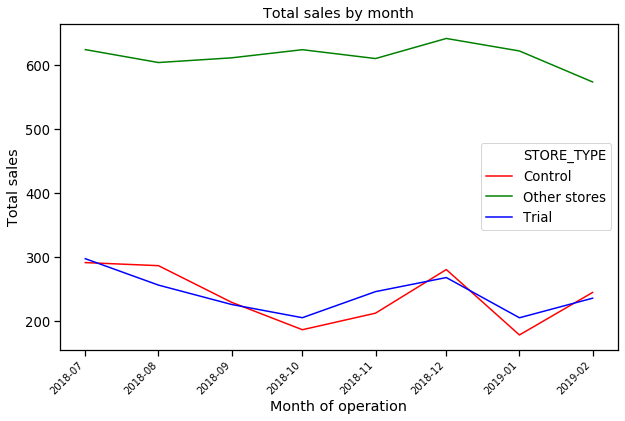

In [134]:
#Plot total sales by month
plt.figure(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2)  
salesPlot = sns.lineplot(x = 'TRANSACTION_MONTH',
                         y = 'TOT_SALES',
                         data = pastSales, 
                         hue = 'STORE_TYPE',
                         palette = ['red','green','blue'])

salesPlot.set(xlabel = 'Month of operation',
              ylabel = 'Total sales',
              title = 'Total sales by month')

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)


salesPlot

Next, number of customers.

#### Visual checks on customer count trends by comparing the trial store to the control store and other stores.

In [135]:
#Tabulate number of customers of each store over time
measureOverTimeCusts = measureOverTime[['STORE_NBR','N_CUSTOMERS','YEARMONTH']]

#Categorise each store into Trial, Control and Other
measureOverTimeCusts = measureOverTimeCusts.assign(STORE_TYPE = measureOverTimeCusts.apply(lambda row: categoriseStoreType(row, controlStore, trialStore), axis = 1))

#Filter months to the period before trial
pastNCusts = measureOverTimeCusts[measureOverTimeCusts['YEARMONTH'] < pd.Timestamp(2019,3,1)].rename(columns = {'YEARMONTH':'TRANSACTION_MONTH'})
                                                                                                    
#Find the mean of all store types' monthly number of customers
pastNCusts = pastNCusts.groupby(['STORE_TYPE','TRANSACTION_MONTH']).mean()['N_CUSTOMERS'].reset_index()

pastNCusts

,STORE_TYPE,TRANSACTION_MONTH,N_CUSTOMERS
0,Control,2018-07-01,51.000000
1,Control,2018-08-01,48.000000
2,Control,2018-09-01,42.000000
3,Control,2018-10-01,35.000000
4,Control,2018-11-01,40.000000
5,Control,2018-12-01,47.000000
6,Control,2019-01-01,35.000000
7,Control,2019-02-01,45.000000
8,Other stores,2018-07-01,70.750000
9,Other stores,2018-08-01,71.352490


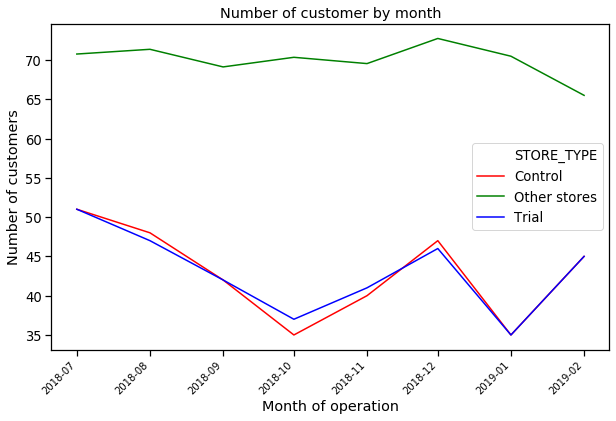

In [136]:
#Plot number of customer over month
plt.figure(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2)  
custsPlot = sns.lineplot(x = 'TRANSACTION_MONTH',
                         y = 'N_CUSTOMERS',
                         data = pastNCusts, 
                         hue = 'STORE_TYPE',
                         palette = ['red','green','blue'])

custsPlot.set(xlabel = 'Month of operation',
              ylabel = 'Number of customers',
              title = 'Number of customer by month')

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)


custsPlot

## Assessment of trial

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales.
<br><br>
We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period.

#### Scale pre-trial control sales to match pre-trial trial store sales

In [137]:
#Calculate the scaling factor for control sales
preTrialMeasures = preTrialMeasures.reset_index()

scalingFactorControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trialStore) & (preTrialMeasures['YEARMONTH'] < pd.Timestamp(2019,3,1))]['TOT_SALES'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == controlStore) & (preTrialMeasures['YEARMONTH'] < pd.Timestamp(2019,3,1))]['TOT_SALES'].sum()

scalingFactorControlSales

1.023617303289553

#### Apply the scaling factor

In [138]:
#Calculate and tabulate the pre trial control store's sales
scaledControlSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == controlStore)]

scaledControlSales = scaledControlSales.assign(CONTROL_SALES = scaledControlSales['TOT_SALES'] * scalingFactorControlSales)

scaledControlSales.rename(columns = {'STORE_NBR':'CTRL_STORE'}, inplace = True)

scaledControlSales

,CTRL_STORE,TOT_SALES,YEARMONTH,STORE_TYPE,CONTROL_SALES
2699,233,290.7,2018-07-01,Control,297.565550
2700,233,285.9,2018-08-01,Control,292.652187
2701,233,228.6,2018-09-01,Control,233.998916
2702,233,185.7,2018-10-01,Control,190.085733
2703,233,211.6,2018-11-01,Control,216.597421
2704,233,279.8,2018-12-01,Control,286.408121
2705,233,177.5,2019-01-01,Control,181.692071
2706,233,244.0,2019-02-01,Control,249.762622
2707,233,199.1,2019-03-01,Control,203.802205
2708,233,158.6,2019-04-01,Control,162.345704


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

#### Calculate the percentage difference between scaled control sales and trial sales

In [139]:
#Tabulate pre trial trial store's sales
trialSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == trialStore)]

trialSales = trialSales.rename(columns = {'STORE_NBR':'TRIAL_STORE','TOT_SALES':'TRIAL_SALES'})

trialSales

,TRIAL_STORE,TRIAL_SALES,YEARMONTH,STORE_TYPE
880,77,296.8,2018-07-01,Trial
881,77,255.5,2018-08-01,Trial
882,77,225.2,2018-09-01,Trial
883,77,204.5,2018-10-01,Trial
884,77,245.3,2018-11-01,Trial
885,77,267.3,2018-12-01,Trial
886,77,204.4,2019-01-01,Trial
887,77,235.0,2019-02-01,Trial
888,77,278.5,2019-03-01,Trial
889,77,263.5,2019-04-01,Trial


In [140]:
#Calculate the percentage difference of control and trial sales
def percentageDiffCalc(row):
    return (abs(row['TRIAL_SALES'] - row['CONTROL_SALES'])) / row['CONTROL_SALES']

In [141]:
#Calculate and tabulate the percentage difference of control
#and trial sales
percentageDiff = pd.merge(trialSales, scaledControlSales, on = 'YEARMONTH')[['YEARMONTH','TRIAL_SALES','CONTROL_SALES']]

percentageDiff = percentageDiff.assign(PERCENTAGE_DIFF = percentageDiff.apply(lambda row: percentageDiffCalc(row), axis = 1))

percentageDiff

,YEARMONTH,TRIAL_SALES,CONTROL_SALES,PERCENTAGE_DIFF
0,2018-07-01,296.8,297.565550,0.002573
1,2018-08-01,255.5,292.652187,0.126950
2,2018-09-01,225.2,233.998916,0.037602
3,2018-10-01,204.5,190.085733,0.075830
4,2018-11-01,245.3,216.597421,0.132516
5,2018-12-01,267.3,286.408121,0.066716
6,2019-01-01,204.4,181.692071,0.124980
7,2019-02-01,235.0,249.762622,0.059107
8,2019-03-01,278.5,203.802205,0.366521
9,2019-04-01,263.5,162.345704,0.623080


Let's see if the difference is significant.

$H_{0} : \ the\,\,sales\,\, in\,\, trial\,\, period\,\, is\,\, the\,\, same\,\, as\,\, the\,\, sales\,\, in\,\, pre-trial\,\, period$
<br><br>
Let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

#### Calculate the standard deviation based on the scaled percentage difference in the pre-trial period.

In [142]:
#Calculate the standard deviation based on percentage difference 
#in the pre-trial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].std()

mean = percentageDiff[percentageDiff['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].mean()

#### Calculate the degrees of freedom

In [143]:
#Note that there are 8 months in the pre-trial period, so DOF = 8 - 1
degreesOfFreedom = 7

We will test with a null hypothesis of there being 0 difference between trial and control stores.

#### Calculate the t-values for the trial months.

In [144]:
#Calculate t value of each row
def calcTValue(row, std):
    return (row['PERCENTAGE_DIFF'] - 0) / std

In [145]:
#Create a t value column of the percentage difference
percentageDiff = percentageDiff.assign(tValue = percentageDiff.apply(lambda row: calcTValue(row, stdDev), axis = 1))

#Show the result of the trial months
percentageDiff[(percentageDiff['YEARMONTH'] > pd.Timestamp(2019,1,1)) & (percentageDiff['YEARMONTH'] < pd.Timestamp(2019,5,1))][['YEARMONTH','tValue']]                             

,YEARMONTH,tValue
7,2019-02-01,1.183534
8,2019-03-01,7.339116
9,2019-04-01,12.476373


In [146]:
#Find the 95th percentile of the t distribution with the appropriate 
#degrees of freedom to compare against
scipy.stats.t.ppf(0.95, degreesOfFreedom) 

1.894578605061305

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

#### Find 95th percentile of the control store.

In [147]:
#Calculate and tabulate the 95th percentile of the control store 
#monthly sales
pastSalesControls95 = measureOverTimeSales[measureOverTimeSales['STORE_TYPE'] == 'Control']

pastSalesControls95 = pastSalesControls95.assign(TOT_SALES = pastSalesControls95['TOT_SALES'] * (1 + stdDev * 2))

pastSalesControls95['STORE_TYPE'] = 'Control 95th % confidence interval'


#### Find 5th percentile of the control store.

In [148]:
#Calculate and tabulate the 5th percentile of the control store 
#monthly sales
pastSalesControls5 = measureOverTimeSales[measureOverTimeSales['STORE_TYPE'] == 'Control']

pastSalesControls5 = pastSalesControls5.assign(TOT_SALES = pastSalesControls5['TOT_SALES'] * (1 - stdDev * 2))

pastSalesControls5['STORE_TYPE'] = 'Control 5th % confidence interval'


#### Plot everything into one graph.

In [149]:
#Find the actual monthly total sales of trial and control stores
trialAssessment = measureOverTimeSales[(measureOverTimeSales['STORE_TYPE'] == 'Control') | (measureOverTimeSales['STORE_TYPE'] == 'Trial')]

#Merge 5th and 95th percentile data to form the confidence interval data
controlConfidence = pd.concat([pastSalesControls95,pastSalesControls5])


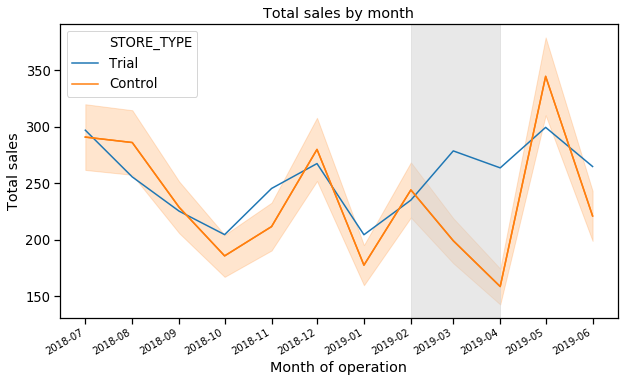

In [150]:
#Plot total sales by month of trial and control store
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2)  
trialPlot = sns.lineplot(data = trialAssessment,
                         x = 'YEARMONTH', 
                         y = 'TOT_SALES', 
                         hue = 'STORE_TYPE', 
                         ax = ax)

confidencePlot = sns.lineplot(data = controlConfidence,
                              x = 'YEARMONTH',
                              y = 'TOT_SALES',
                              ax = ax)

trialPlot.set(xlabel = 'Month of operation',
              ylabel = 'Total sales',
              title = 'Total sales by month')

trialPlot.xaxis.set_major_locator(dates.MonthLocator())

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

ax.axvspan(*dates.datestr2num(['2/1/2019', '4/1/2019']), color = 'lightgrey', alpha = 0.5)
fig.autofmt_xdate()

trialPlot

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for number of customers as well.

#### Scale pre-trial control customers to match pre-trial trial store customers

In [151]:
#Calculate the scaling factor for control store's number of customer
scalingFactorControlCusts = pastNCusts[(pastNCusts['STORE_TYPE'] == 'Trial')]['N_CUSTOMERS'].sum() / pastNCusts[(pastNCusts['STORE_TYPE'] == 'Control')]['N_CUSTOMERS'].sum()

scalingFactorControlCusts

1.0029154518950438

#### Apply the scaling factor

In [152]:
#Calculate and tabulate the pre trial control store's number 
#of customers
scaledControlCusts = measureOverTimeCusts[(measureOverTimeCusts['STORE_NBR'] == controlStore)]

scaledControlCusts = scaledControlCusts.assign(CONTROL_NCUSTS = scaledControlCusts['N_CUSTOMERS'] * scalingFactorControlCusts) 

scaledControlCusts.rename(columns = {'STORE_NBR':'CTRL_STORE'}, inplace = True)

scaledControlCusts

,CTRL_STORE,N_CUSTOMERS,YEARMONTH,STORE_TYPE,CONTROL_NCUSTS
2699,233,51,2018-07-01,Control,51.148688
2700,233,48,2018-08-01,Control,48.139942
2701,233,42,2018-09-01,Control,42.122449
2702,233,35,2018-10-01,Control,35.102041
2703,233,40,2018-11-01,Control,40.116618
2704,233,47,2018-12-01,Control,47.137026
2705,233,35,2019-01-01,Control,35.102041
2706,233,45,2019-02-01,Control,45.131195
2707,233,40,2019-03-01,Control,40.116618
2708,233,30,2019-04-01,Control,30.087464


#### Calculate the percentage difference between scaled control sales and trial sales

In [153]:
#Tabulate pre trial trial store's number of customers
trialNCusts = measureOverTimeCusts[(measureOverTimeCusts['STORE_NBR' ] == trialStore)]

trialNCusts = trialNCusts.rename(columns = {'N_CUSTOMERS':'TRIAL_NCUSTS'})

trialNCusts

,STORE_NBR,TRIAL_NCUSTS,YEARMONTH,STORE_TYPE
880,77,51,2018-07-01,Trial
881,77,47,2018-08-01,Trial
882,77,42,2018-09-01,Trial
883,77,37,2018-10-01,Trial
884,77,41,2018-11-01,Trial
885,77,46,2018-12-01,Trial
886,77,35,2019-01-01,Trial
887,77,45,2019-02-01,Trial
888,77,50,2019-03-01,Trial
889,77,47,2019-04-01,Trial


In [154]:
#Calculate the percentage difference of control and trial number 
#of customer
def percentageDiffCustsCalc(row):
    return (abs(row['TRIAL_NCUSTS'] - row['CONTROL_NCUSTS'])) / row['CONTROL_NCUSTS'] 

In [155]:
#Calculate and tabulate the percentage difference of control and 
#trial number of customers
percentageDiffCusts = pd.merge(trialNCusts, scaledControlCusts, on = 'YEARMONTH')[['YEARMONTH','TRIAL_NCUSTS','CONTROL_NCUSTS']]

percentageDiffCusts = percentageDiffCusts.assign(PERCENTAGE_DIFF = percentageDiffCusts.apply(lambda row: percentageDiffCustsCalc(row), axis = 1))

percentageDiffCusts

,YEARMONTH,TRIAL_NCUSTS,CONTROL_NCUSTS,PERCENTAGE_DIFF
0,2018-07-01,51,51.148688,0.002907
1,2018-08-01,47,48.139942,0.023680
2,2018-09-01,42,42.122449,0.002907
3,2018-10-01,37,35.102041,0.054070
4,2018-11-01,41,40.116618,0.022020
5,2018-12-01,46,47.137026,0.024122
6,2019-01-01,35,35.102041,0.002907
7,2019-02-01,45,45.131195,0.002907
8,2019-03-01,50,40.116618,0.246366
9,2019-04-01,47,30.087464,0.562112


Let's see if the difference is significant.

$H_{0} : \ the\,\,number\,\,of\,\,customers\,\, in\,\, trial\,\, period\,\, is\,\, the\,\, same\,\, as\,\, the\,\, number\,\,of\,\,customers\,\, in\,\, pre-trial\,\, period$

#### Calculate the standard deviation based on the scaled percentage difference in the pre-trial period.

In [156]:
#Calculate the standard deviation based on percentage difference 
#in the pre-trial period
stdDev = percentageDiffCusts[percentageDiffCusts['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].std()

mean = percentageDiffCusts[percentageDiffCusts['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].mean()

#### Calculate the degrees of freedom

In [157]:
#Note that there are 8 months in the pre-trial period, so DOF = 8 - 1
degreesOfFreedom = 7

We will test with a null hypothesis of there being 0 difference between trial and control stores.


In [158]:
#Calculate the t value of each row
percentageDiffCusts = percentageDiffCusts.assign(tValue = percentageDiffCusts.apply(lambda row: calcTValue(row, stdDev), axis = 1)) 

percentageDiffCusts

,YEARMONTH,TRIAL_NCUSTS,CONTROL_NCUSTS,PERCENTAGE_DIFF,tValue
0,2018-07-01,51,51.148688,0.002907,0.156731
1,2018-08-01,47,48.139942,0.023680,1.276702
2,2018-09-01,42,42.122449,0.002907,0.156731
3,2018-10-01,37,35.102041,0.054070,2.915191
4,2018-11-01,41,40.116618,0.022020,1.187235
5,2018-12-01,46,47.137026,0.024122,1.300532
6,2019-01-01,35,35.102041,0.002907,0.156731
7,2019-02-01,45,45.131195,0.002907,0.156731
8,2019-03-01,50,40.116618,0.246366,13.282929
9,2019-04-01,47,30.087464,0.562112,30.306498


Let's again see if the difference is significant visually!

#### Find 95th percentile of the control store.

In [159]:
#Calculate and tabulate the 95th percentile of the control store 
#monthly number of customers
pastCustsControl95 = measureOverTimeCusts[measureOverTimeCusts['STORE_TYPE'] == 'Control']

pastCustsControl95 = pastCustsControl95.assign(N_CUSTOMERS = pastCustsControl95['N_CUSTOMERS'] * (1 + stdDev * 2)) 

pastCustsControl95['STORE_TYPE'] = 'Control 95th % confidence interval'


#### Find 5th percentile of the control store.

In [160]:
#Calculate and tabulate the 5th percentile of the control store 
#monthly number of customers
pastCustsControl5 = measureOverTimeCusts[measureOverTimeCusts['STORE_TYPE'] == 'Control']

pastCustsControl5 = pastCustsControl5.assign(N_CUSTOMERS = pastCustsControl5['N_CUSTOMERS'] * (1 - stdDev * 2)) 

pastCustsControl5['STORE_TYPE'] = 'Control 5th % confidence interval'

Plot everything into one graph.

In [161]:
#Find the actual monthly number of customers of trial and control 
#stores 
trialAssessment = measureOverTimeCusts[(measureOverTimeCusts['STORE_TYPE'] == 'Control') | (measureOverTimeCusts['STORE_TYPE'] == 'Trial')]

#Merge 5th and 95th percentile data to form the confidence interval
#data
controlConfidence = pd.concat([pastCustsControl95,pastCustsControl5])


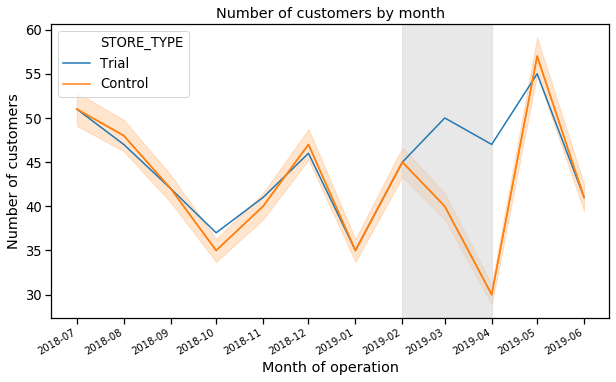

In [162]:
#Plot number of customers by month of trial and control store
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2)  
trialPlot = sns.lineplot(data = trialAssessment,
                         x = 'YEARMONTH', 
                         y = 'N_CUSTOMERS', 
                         hue = 'STORE_TYPE', 
                         ax = ax)

confidencePlot = sns.lineplot(data = controlConfidence,
                              x = 'YEARMONTH',
                              y = 'N_CUSTOMERS',
                              ax = ax)

trialPlot.set(xlabel = 'Month of operation',
              ylabel = 'Number of customers',
              title = 'Number of customers by month')

trialPlot.xaxis.set_major_locator(dates.MonthLocator())

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

ax.axvspan(*dates.datestr2num(['2/1/2019', '4/1/2019']), color = 'lightgrey', alpha = 0.5)
fig.autofmt_xdate()

trialPlot

Let's repeat finding the control store and assessing the impact of the trial for each of the other two trial stores.

## Trial store 86

#### Use the function to calculate correlations against store 86 using total sales and number of customers.

In [163]:
#Calculate correlation against store 86 using total sales and number 
#of customers
trialStore = 86

corrNSales = calculateCorrelation(preTrialMeasures, 'TOT_SALES', trialStore)

corrNCustomers = calculateCorrelation(preTrialMeasures, 'N_CUSTOMERS', trialStore)


#### Use the functions for calculating magnitude.

In [164]:
#Calculate magnitude between stores and trial stores using total 
#sales and number of customers
magnitudeNSales = calculateMagnitudeDistance(preTrialMeasures, 'TOT_SALES', trialStore)

magnitudeNCustomers = calculateMagnitudeDistance(preTrialMeasures, 'N_CUSTOMERS', trialStore)


#### Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.

In [165]:
#Calculate and tabulate combined score of total sales composed of 
#correlation and magnitude
corrWeight = 0.5

scoreNSales = pd.merge(corrNSales, magnitudeNSales, on = ['Store1', 'Store2'])

scoreNSales = scoreNSales.assign(scoreNSales = corrWeight * scoreNSales['corrMeasure'] + (1 - corrWeight) * scoreNSales['magnitudeMeasure'])

scoreNSales

,corrMeasure,Store1,Store2,magnitudeMeasure,scoreNSales
0,0.238095,86.0,1.0,0.285042,0.261569
1,0.238095,86.0,2.0,0.246008,0.242052
2,-0.428571,86.0,3.0,0.787565,0.179497
3,0.047619,86.0,4.0,0.545741,0.296680
4,-0.047619,86.0,5.0,0.931094,0.441738
...,...,...,...,...,...
255,0.142857,86.0,268.0,0.309536,0.226197
256,0.523810,86.0,269.0,0.909085,0.716447
257,-0.523810,86.0,270.0,0.851886,0.164038
258,0.142857,86.0,271.0,0.926653,0.534755


In [166]:
#Calculate and tabulate combined score of number of customers 
#composed of correlation and magnitude
scoreNCustomers = pd.merge(corrNCustomers, magnitudeNCustomers, on = ['Store1','Store2'])

scoreNCustomers = scoreNCustomers.assign(scoreNCust = corrWeight * scoreNCustomers['corrMeasure'] + (1 - corrWeight) * scoreNCustomers['magnitudeMeasure'])

scoreNCustomers

,corrMeasure,Store1,Store2,magnitudeMeasure,scoreNCust
0,0.550000,86.0,1.0,0.497354,0.523677
1,-0.052705,86.0,2.0,0.437831,0.192563
2,-0.205196,86.0,3.0,0.921958,0.358381
3,-0.150000,86.0,4.0,0.798942,0.324471
4,-0.195180,86.0,5.0,0.931217,0.368018
...,...,...,...,...,...
255,-0.097590,86.0,268.0,0.480159,0.191284
256,-0.292770,86.0,269.0,0.927249,0.317239
257,-0.650791,86.0,270.0,0.903439,0.126324
258,0.150000,86.0,271.0,0.940476,0.545238


#### Combine scores across the drivers by first merging our sales scores and customer scores into a single table.

In [167]:
#Calculate and tabulate the combined score of all the stores 
scoreControl = pd.merge(scoreNSales,scoreNCustomers,on = ['Store1','Store2'])[['Store1','Store2','scoreNSales','scoreNCust']] 

scoreControl = scoreControl.assign(finalControlScore = scoreControl['scoreNSales'] * 0.5 + scoreControl['scoreNCust'] * 0.5)

scoreControl

,Store1,Store2,scoreNSales,scoreNCust,finalControlScore
0,86.0,1.0,0.261569,0.523677,0.392623
1,86.0,2.0,0.242052,0.192563,0.217307
2,86.0,3.0,0.179497,0.358381,0.268939
3,86.0,4.0,0.296680,0.324471,0.310575
4,86.0,5.0,0.441738,0.368018,0.404878
...,...,...,...,...,...
255,86.0,268.0,0.226197,0.191284,0.208741
256,86.0,269.0,0.716447,0.317239,0.516843
257,86.0,270.0,0.164038,0.126324,0.145181
258,86.0,271.0,0.534755,0.545238,0.539997


#### Select the most appropriate control store for trial store 86 by finding the store with the highest final score.

In [168]:
#Sort scoreControl by finalControlScore in descending order and find
#the second store with the highest score
scoreControl.sort_values(by = 'finalControlScore', ascending = False).iloc[[1]]

,Store1,Store2,scoreNSales,scoreNCust,finalControlScore
147,86.0,155.0,0.839979,0.968386,0.904182


In [169]:
#Found the store with the highest final score 
controlStore = 155

Looks like store 155 will be a control store for trial store 86.
<br><br> 
Again, let's check visually if the drivers are indeed similar in the period before the trial.

We'll look at total sales first.

#### Conduct visual checks on trends based on the drivers

In [170]:
#Tabulate total sales of each store over time
measureOverTimeSales = measureOverTime[['STORE_NBR','TOT_SALES','YEARMONTH']]

#Categorise each store into Trial, Control and Other
measureOverTimeSales = measureOverTimeSales.assign(STORE_TYPE = measureOverTimeSales.apply(lambda row: categoriseStoreType(row, controlStore, trialStore), axis = 1))

#Filter months to the period before trial
pastSales = measureOverTimeSales[measureOverTimeSales['YEARMONTH'] < pd.Timestamp(2019,3,1)].rename(columns = {'YEARMONTH':'TRANSACTION_MONTH'})

#Find the mean of all store types monthly total sales
pastSales = pastSales.groupby(['STORE_TYPE','TRANSACTION_MONTH']).mean()['TOT_SALES'].reset_index()

pastSales

,STORE_TYPE,TRANSACTION_MONTH,TOT_SALES
0,Control,2018-07-01,924.600000
1,Control,2018-08-01,782.700000
2,Control,2018-09-01,1014.400000
3,Control,2018-10-01,963.800000
4,Control,2018-11-01,898.800000
5,Control,2018-12-01,849.800000
6,Control,2019-01-01,874.600000
7,Control,2019-02-01,891.200000
8,Other stores,2018-07-01,619.160985
9,Other stores,2018-08-01,599.748276


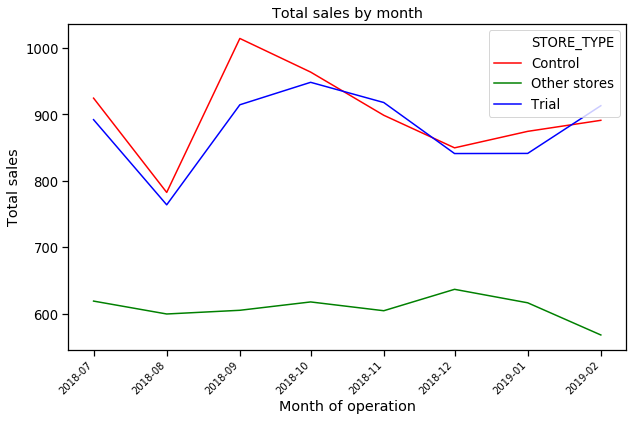

In [171]:
#Plot total sales by month 
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 
salesPlot = sns.lineplot(x = 'TRANSACTION_MONTH',
                         y = 'TOT_SALES', 
                         data = pastSales, 
                         hue = 'STORE_TYPE',
                         palette = ['red','green','blue'])

salesPlot.set(xlabel = 'Month of operation', 
              ylabel = 'Total sales',
              title = 'Total sales by month')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

ax.legend(loc = 'upper right')

salesPlot


Great, sales are trending in a similar way.

Next, number of customers.

#### Conduct visual checks on customer count trends by comparing the trial store to the control store and other stores.

In [172]:
#Tabulate number of customers of each store over time 
measureOverTimeCusts = measureOverTime[['STORE_NBR','N_CUSTOMERS','YEARMONTH']]

#Categorise each store into Trial, Control and Other
measureOverTimeCusts = measureOverTimeCusts.assign(STORE_TYPE = measureOverTimeCusts.apply(lambda row: categoriseStoreType(row, controlStore, trialStore), axis = 1))

#Filter months to the period before trial
pastNCusts = measureOverTimeCusts[measureOverTimeCusts['YEARMONTH'] < pd.Timestamp(2019,3,1)].rename(columns = {'YEARMONTH':'TRANSACTION_MONTH'})

#Find the mean of all store types' monthly number of customers
pastNCusts = pastNCusts.groupby(['STORE_TYPE','TRANSACTION_MONTH']).mean()['N_CUSTOMERS'].reset_index()

pastNCusts

,STORE_TYPE,TRANSACTION_MONTH,N_CUSTOMERS
0,Control,2018-07-01,101.000000
1,Control,2018-08-01,91.000000
2,Control,2018-09-01,103.000000
3,Control,2018-10-01,108.000000
4,Control,2018-11-01,101.000000
5,Control,2018-12-01,97.000000
6,Control,2019-01-01,96.000000
7,Control,2019-02-01,95.000000
8,Other stores,2018-07-01,70.378788
9,Other stores,2018-08-01,71.007663


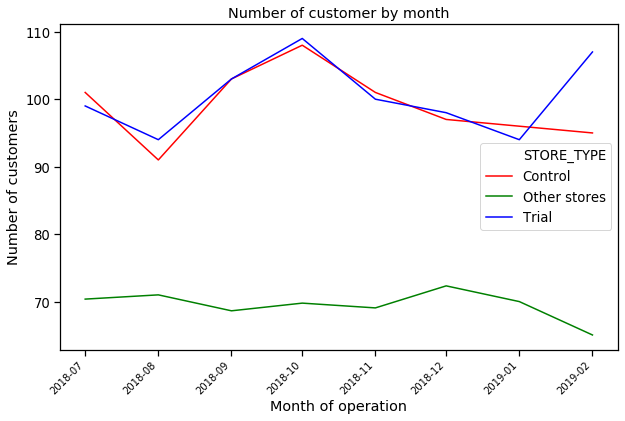

In [173]:
#Plot number of customer over month 
plt.figure(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 
custsPlot = sns.lineplot(x = 'TRANSACTION_MONTH',
                         y = 'N_CUSTOMERS', 
                         data = pastNCusts, 
                         hue = 'STORE_TYPE',
                         palette = ['red','green','blue'])

custsPlot.set(xlabel = 'Month of operation', 
              ylabel = 'Number of customers',
              title = 'Number of customer by month')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

custsPlot

Good, the trend in number of customers is also similar.

Let's now assess the impact of the trial on sales.

## Assessment of trial

#### Scale pre-trial control sales to match pre-trial trial store sales

In [174]:
#Calculate the scaling factor for control sales
preTrialMeasures = preTrialMeasures.reset_index() 

scalingFactorControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trialStore) & (preTrialMeasures['YEARMONTH'] < pd.Timestamp(2019,3,1))]['TOT_SALES'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == controlStore) & (preTrialMeasures['YEARMONTH'] < pd.Timestamp(2019,3,1))]['TOT_SALES'].sum()

scalingFactorControlSales

0.9700651481287746

#### Apply the scaling factor

In [175]:
#Calculate and tabulate the pre trial control store's sales 
scaledControlSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == controlStore)]

scaledControlSales = scaledControlSales.assign(CONTROL_SALES = scaledControlSales['TOT_SALES'] * scalingFactorControlSales) 

scaledControlSales.rename(columns = {'STORE_NBR':'CTRL_STORE'}, inplace = True)

scaledControlSales

,CTRL_STORE,TOT_SALES,YEARMONTH,STORE_TYPE,CONTROL_SALES
1793,155,924.60,2018-07-01,Control,896.922236
1794,155,782.70,2018-08-01,Control,759.269991
1795,155,1014.40,2018-09-01,Control,984.034086
1796,155,963.80,2018-10-01,Control,934.948790
1797,155,898.80,2018-11-01,Control,871.894555
1798,155,849.80,2018-12-01,Control,824.361363
1799,155,874.60,2019-01-01,Control,848.418979
1800,155,891.20,2019-02-01,Control,864.522060
1801,155,804.40,2019-03-01,Control,780.320405
1802,155,844.60,2019-04-01,Control,819.317024


#### Calculate the percentage difference between scaled control sales and trial sales

In [176]:
#Tabulate pre trial trial store's sales
trialSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == trialStore)]

trialSales = trialSales.rename(columns = {'STORE_NBR':'TRIAL_STORE','TOT_SALES':'TRIAL_SALES'})

trialSales

,TRIAL_STORE,TRIAL_SALES,YEARMONTH,STORE_TYPE
977,86,892.20,2018-07-01,Trial
978,86,764.05,2018-08-01,Trial
979,86,914.60,2018-09-01,Trial
980,86,948.40,2018-10-01,Trial
981,86,918.00,2018-11-01,Trial
982,86,841.20,2018-12-01,Trial
983,86,841.40,2019-01-01,Trial
984,86,913.20,2019-02-01,Trial
985,86,1026.80,2019-03-01,Trial
986,86,848.20,2019-04-01,Trial


In [177]:
#Calculate and tabulate the percentage difference of control 
#and trial sales
percentageDiff = pd.merge(trialSales, scaledControlSales, on = 'YEARMONTH')[['YEARMONTH','TRIAL_SALES','CONTROL_SALES']] 

percentageDiff = percentageDiff.assign(PERCENTAGE_DIFF = percentageDiff.apply(lambda row: percentageDiffCalc(row), axis = 1))

percentageDiff

,YEARMONTH,TRIAL_SALES,CONTROL_SALES,PERCENTAGE_DIFF
0,2018-07-01,892.20,896.922236,0.005265
1,2018-08-01,764.05,759.269991,0.006296
2,2018-09-01,914.60,984.034086,0.070561
3,2018-10-01,948.40,934.948790,0.014387
4,2018-11-01,918.00,871.894555,0.052880
5,2018-12-01,841.20,824.361363,0.020426
6,2019-01-01,841.40,848.418979,0.008273
7,2019-02-01,913.20,864.522060,0.056306
8,2019-03-01,1026.80,780.320405,0.315870
9,2019-04-01,848.20,819.317024,0.035253


Let's see if the difference is significant

$H_{0} : \ the\,\,sales\,\, in\,\, trial\,\, period\,\, is\,\, the\,\, same\,\, as\,\, the\,\, sales\,\, in\,\, pre-trial\,\, period$
<br><br>
Let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

#### Calculate the standard deviation of percentage differences during the pre-trial period.

In [178]:
#Calculate the standard deviation based on percentage difference 
#in the pre-trial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].std()

mean = percentageDiff[percentageDiff['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].mean()


#### Calculate the degrees of freedom

In [179]:
#Note that there are 8 months in the pre-trial period, so DOF = 8 - 1
degreesOfFreedom = 7

#### Calculate the t-values for the trial months.

In [180]:
#Create a column of t value for percentage difference
percentageDiff = percentageDiff.assign(tValue = percentageDiff.apply(lambda row: calcTValue(row, stdDev), axis = 1)) 

percentageDiff

,YEARMONTH,TRIAL_SALES,CONTROL_SALES,PERCENTAGE_DIFF,tValue
0,2018-07-01,892.20,896.922236,0.005265,0.203799
1,2018-08-01,764.05,759.269991,0.006296,0.243692
2,2018-09-01,914.60,984.034086,0.070561,2.731315
3,2018-10-01,948.40,934.948790,0.014387,0.556907
4,2018-11-01,918.00,871.894555,0.052880,2.046904
5,2018-12-01,841.20,824.361363,0.020426,0.790676
6,2019-01-01,841.40,848.418979,0.008273,0.320238
7,2019-02-01,913.20,864.522060,0.056306,2.179542
8,2019-03-01,1026.80,780.320405,0.315870,12.226922
9,2019-04-01,848.20,819.317024,0.035253,1.364580


We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March - i.e. the increase in sales in the trial store in March is statistically greater than in the control store.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

#### Find 95th percentile of the control store.

In [181]:
#Calculate and tabulate the 95th percentile of the control store 
#monthly sales
pastSalesControls95 = measureOverTimeSales[measureOverTimeSales['STORE_TYPE'] == 'Control']

pastSalesControls95 = pastSalesControls95.assign(TOT_SALES = pastSalesControls95['TOT_SALES'] * (1 + stdDev * 2)) 

pastSalesControls95['STORE_TYPE'] = 'Control 95th % confidence interval'


#### Find 5th percentile of the control store.

In [182]:
#Calculate and tabulate the 5th percentile of the control store 
#monthly sales
pastSalesControls5 = measureOverTimeSales[measureOverTimeSales['STORE_TYPE'] == 'Control']

pastSalesControls5 = pastSalesControls5.assign(TOT_SALES = pastSalesControls5['TOT_SALES'] * (1 - stdDev * 2))

pastSalesControls5['STORE_TYPE'] = 'Control 5th % confidence interval'


#### Plot everything into one graph.

In [183]:
#Find the actual monthly total sales of trial and control stores 
trialAssessment = measureOverTimeSales[(measureOverTimeSales['STORE_TYPE'] == 'Control') | (measureOverTimeSales['STORE_TYPE'] == 'Trial')]

#Merge 5th and 95th percentile data to form the confidence interval
#data
controlConfidence = pd.concat([pastSalesControls95,pastSalesControls5])

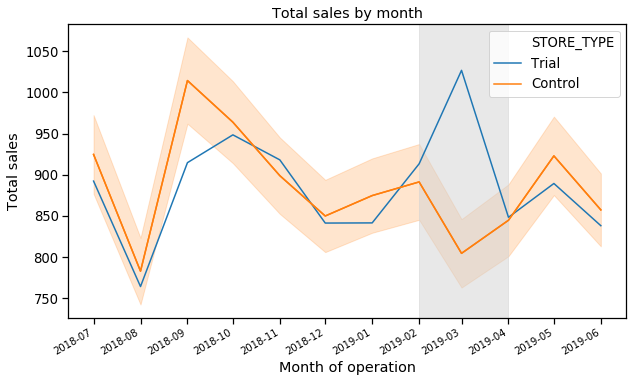

In [184]:
#Plot total sales by month of trial and control store 
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 
trialPlot = sns.lineplot(data = trialAssessment,
                         x = 'YEARMONTH',
                         y = 'TOT_SALES',
                         hue = 'STORE_TYPE', 
                         ax = ax)

confidencePlot = sns.lineplot(data = controlConfidence,
                              x = 'YEARMONTH',
                              y = 'TOT_SALES', 
                              ax = ax)

trialPlot.set(xlabel = 'Month of operation',
              ylabel = 'Total sales',
              title = 'Total sales by month') 

trialPlot.xaxis.set_major_locator(dates.MonthLocator())

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light', 
           fontsize = 10.0)

ax.axvspan(*dates.datestr2num(['2/1/2019', '4/1/2019']), color = 'lightgrey', alpha = 0.5)
fig.autofmt_xdate()
ax.legend(loc = 'upper right')

trialPlot

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.
<br><br>
Let's have a look at assessing this for the number of customers as well.

#### Scale pre-trial control customers to match pre-trial trial store customers

In [185]:
#Calculate the scaling factor for control store's number of customer
scalingFactorControlCusts = pastNCusts[(pastNCusts['STORE_TYPE'] == 'Trial')]['N_CUSTOMERS'].sum() / pastNCusts[(pastNCusts['STORE_TYPE'] == 'Control')]['N_CUSTOMERS'].sum()

scalingFactorControlCusts

1.0151515151515151

#### Apply the scaling factor

In [186]:
#Calculate and tabulate the pre trial control store's number of customers
scaledControlCusts = measureOverTimeCusts[(measureOverTimeCusts['STORE_NBR'] == controlStore)]

scaledControlCusts = scaledControlCusts.assign(CONTROL_NCUSTS = scaledControlCusts['N_CUSTOMERS'] * scalingFactorControlCusts) 

scaledControlCusts.rename(columns = {'STORE_NBR':'CTRL_STORE'}, inplace = True)

scaledControlCusts

,CTRL_STORE,N_CUSTOMERS,YEARMONTH,STORE_TYPE,CONTROL_NCUSTS
1793,155,101,2018-07-01,Control,102.530303
1794,155,91,2018-08-01,Control,92.378788
1795,155,103,2018-09-01,Control,104.560606
1796,155,108,2018-10-01,Control,109.636364
1797,155,101,2018-11-01,Control,102.530303
1798,155,97,2018-12-01,Control,98.469697
1799,155,96,2019-01-01,Control,97.454545
1800,155,95,2019-02-01,Control,96.439394
1801,155,94,2019-03-01,Control,95.424242
1802,155,99,2019-04-01,Control,100.500000


#### Calculate the percentage difference between scaled control sales and trial sales

In [187]:
#Tabulate pre trial trial store's number of customers
trialNCusts = measureOverTimeCusts[(measureOverTimeCusts['STORE_NBR'] == trialStore)]

trialNCusts = trialNCusts.rename(columns = {'N_CUSTOMERS':'TRIAL_NCUSTS'})

trialNCusts

,STORE_NBR,TRIAL_NCUSTS,YEARMONTH,STORE_TYPE
977,86,99,2018-07-01,Trial
978,86,94,2018-08-01,Trial
979,86,103,2018-09-01,Trial
980,86,109,2018-10-01,Trial
981,86,100,2018-11-01,Trial
982,86,98,2018-12-01,Trial
983,86,94,2019-01-01,Trial
984,86,107,2019-02-01,Trial
985,86,115,2019-03-01,Trial
986,86,105,2019-04-01,Trial


In [188]:
#Calculate and tabulate the percentage difference of control and 
#trial number of customers
percentageDiffCusts = pd.merge(trialNCusts, scaledControlCusts, on = 'YEARMONTH')[['YEARMONTH','TRIAL_NCUSTS','CONTROL_NCUSTS']] 

percentageDiffCusts = percentageDiffCusts.assign(PERCENTAGE_DIFF = percentageDiffCusts.apply(lambda row: percentageDiffCustsCalc(row), axis = 1))

percentageDiffCusts

,YEARMONTH,TRIAL_NCUSTS,CONTROL_NCUSTS,PERCENTAGE_DIFF
0,2018-07-01,99,102.530303,0.034432
1,2018-08-01,94,92.378788,0.017550
2,2018-09-01,103,104.560606,0.014925
3,2018-10-01,109,109.636364,0.005804
4,2018-11-01,100,102.530303,0.024679
5,2018-12-01,98,98.469697,0.004770
6,2019-01-01,94,97.454545,0.035448
7,2019-02-01,107,96.439394,0.109505
8,2019-03-01,115,95.424242,0.205144
9,2019-04-01,105,100.500000,0.044776


Let's see if the difference is significant.

$H_{0} : \ the\,\,number\,\,of\,\,customers\,\, in\,\, trial\,\, period\,\, is\,\, the\,\, same\,\, as\,\, the\,\, number\,\,of\,\,customers\,\, in\,\, pre-trial\,\, period$

#### Calculate the standard deviation based on the scaled percentage difference in the pre-trial period.

In [189]:
#Calculate the standard deviation based on percentage difference
#in the pre-trial period
stdDev = percentageDiffCusts[percentageDiffCusts['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].std()

mean = percentageDiffCusts[percentageDiffCusts['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].mean()

#### Calculate the degrees of freedom

In [190]:
#Note that there are 8 months in the pre-trial period, so DOF = 8 - 1
degreesOfFreedom = 7

We will test with a null hypothesis of there being 0 difference between trial and control stores.

In [191]:
#Create a column for tvalue of percentage difference
percentageDiffCusts = percentageDiffCusts.assign(tValue = percentageDiffCusts.apply(lambda row: calcTValue(row, stdDev), axis = 1))

percentageDiffCusts

,YEARMONTH,TRIAL_NCUSTS,CONTROL_NCUSTS,PERCENTAGE_DIFF,tValue
0,2018-07-01,99,102.530303,0.034432,2.760869
1,2018-08-01,94,92.378788,0.017550,1.407193
2,2018-09-01,103,104.560606,0.014925,1.196772
3,2018-10-01,109,109.636364,0.005804,0.465411
4,2018-11-01,100,102.530303,0.024679,1.978820
5,2018-12-01,98,98.469697,0.004770,0.382473
6,2019-01-01,94,97.454545,0.035448,2.842333
7,2019-02-01,107,96.439394,0.109505,8.780524
8,2019-03-01,115,95.424242,0.205144,16.449244
9,2019-04-01,105,100.500000,0.044776,3.590315


#### Find 95th percentile of the control store.

In [192]:
#Calculate and tabulate the 95th percentile of the control store 
#monthly number of customers
pastCustsControl95 = measureOverTimeCusts[measureOverTimeCusts['STORE_TYPE'] == 'Control']

pastCustsControl95 = pastCustsControl95.assign(N_CUSTOMERS = pastCustsControl95['N_CUSTOMERS'] * (1 + stdDev * 2)) 

pastCustsControl95['STORE_TYPE'] = 'Control 95th % confidence interval'


#### Find 5th percentile of the control store.

In [193]:
#Calculate and tabulate the 5th percentile of the control store 
#monthly number of customers
pastCustsControl5 = measureOverTimeCusts[measureOverTimeCusts['STORE_TYPE'] == 'Control']

pastCustsControl5 = pastCustsControl5.assign(N_CUSTOMERS = pastCustsControl5['N_CUSTOMERS'] * (1 - stdDev * 2)) 

pastCustsControl5['STORE_TYPE'] = 'Control 5th % confidence interval'


Plot everything into one graph.

In [194]:
#Find the actual monthly number of customers of trial and control 
#stores
trialAssessment = measureOverTimeCusts[(measureOverTimeCusts['STORE_TYPE'] == 'Control') | (measureOverTimeCusts['STORE_TYPE'] == 'Trial')]

#Merge 5th and 95th percentile data to form the confidence interval 
#data
controlConfidence = pd.concat([pastCustsControl95,pastCustsControl5])

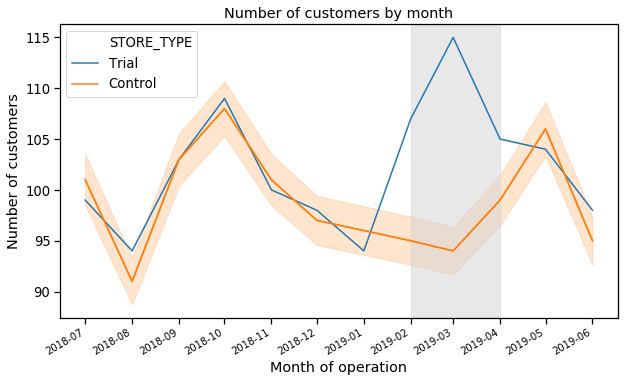

In [195]:
#Plot number of customers by month of trial and control store 
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 
trialPlot = sns.lineplot(data = trialAssessment,
                         x = 'YEARMONTH',
                         y = 'N_CUSTOMERS',
                         hue = 'STORE_TYPE',
                         ax = ax)

confidencePlot = sns.lineplot(data = controlConfidence,
                              x = 'YEARMONTH',
                              y = 'N_CUSTOMERS',
                              ax = ax)

trialPlot.set(xlabel = 'Month of operation', 
              ylabel = 'Number of customers',
              title = 'Number of customers by month') 

trialPlot.xaxis.set_major_locator(dates.MonthLocator())
plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

ax.axvspan(*dates.datestr2num(['2/1/2019', '4/1/2019']), color = 'lightgrey', alpha = 0.5)
fig.autofmt_xdate()

trialPlot

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results

## Trial store 88

#### Use the function to calculate correlations against store 86 using total sales and number of customers.

In [196]:
#Calculate correlation against store 88 using total sales and 
#number of customers
trialStore = 88

corrNSales = calculateCorrelation(preTrialMeasures, 'TOT_SALES', trialStore)

corrNCustomers = calculateCorrelation(preTrialMeasures, 'N_CUSTOMERS', trialStore)

#### Use the functions for calculating magnitude.

In [197]:
#Calculate magnitude between stores and trial stores using total 
#sales and number of customers
magnitudeNSales = calculateMagnitudeDistance(preTrialMeasures, 'TOT_SALES', trialStore)

magnitudeNCustomers = calculateMagnitudeDistance(preTrialMeasures, 'N_CUSTOMERS', trialStore)

#### Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.

In [198]:
#Calculate and tabulate combined score of total sales composed of
#correlation and magnitude
corrWeight = 0.5

scoreNSales = pd.merge(corrNSales, magnitudeNSales, on = ['Store1', 'Store2'])

scoreNSales = scoreNSales.assign(scoreNSales = (corrWeight * scoreNSales['corrMeasure']) + ((1 - corrWeight) * scoreNSales['magnitudeMeasure']))

scoreNSales

,corrMeasure,Store1,Store2,magnitudeMeasure,scoreNSales
0,0.523810,88.0,1.0,0.190486,0.357148
1,-0.047619,88.0,2.0,0.164328,0.058355
2,-0.523810,88.0,3.0,0.811969,0.144080
3,-0.619048,88.0,4.0,0.903466,0.142209
4,0.047619,88.0,5.0,0.631124,0.339372
...,...,...,...,...,...
255,0.047619,88.0,268.0,0.206901,0.127260
256,-0.142857,88.0,269.0,0.724743,0.290943
257,-0.428571,88.0,270.0,0.728129,0.149779
258,-0.142857,88.0,271.0,0.633696,0.245419


In [199]:
#Calculate and tabulate combined score of number of customers 
#composed of correlation and magnitude
scoreNCustomers = pd.merge(corrNCustomers, magnitudeNCustomers, on = ['Store1','Store2'])

scoreNCustomers = scoreNCustomers.assign(scoreNCust = (corrWeight * scoreNCustomers['corrMeasure']) + ((1 - corrWeight) * scoreNCustomers['magnitudeMeasure']))

scoreNCustomers

,corrMeasure,Store1,Store2,magnitudeMeasure,scoreNCust
0,0.097590,88.0,1.0,0.376523,0.237056
1,-0.308607,88.0,2.0,0.326689,0.009041
2,0.350438,88.0,3.0,0.849391,0.599915
3,-0.292770,88.0,4.0,0.928018,0.317624
4,0.047619,88.0,5.0,0.746401,0.397010
...,...,...,...,...,...
255,0.714286,88.0,268.0,0.362126,0.538206
256,-0.142857,88.0,269.0,0.851606,0.354374
257,0.158777,88.0,270.0,0.838317,0.498547
258,0.097590,88.0,271.0,0.747508,0.422549


#### Combine scores across the drivers by first merging our sales scores and customer scores into a single table.

In [200]:
#Calculate and tabulate the combined score of all the stores 
scoreControl = pd.merge(scoreNSales,scoreNCustomers,on = ['Store1', 'Store2'])[['Store1','Store2','scoreNSales','scoreNCust']]

scoreControl = scoreControl.assign(finalControlScore = (scoreControl['scoreNSales'] * 0.5) + (scoreControl['scoreNCust'] * 0.5))

scoreControl

,Store1,Store2,scoreNSales,scoreNCust,finalControlScore
0,88.0,1.0,0.357148,0.237056,0.297102
1,88.0,2.0,0.058355,0.009041,0.033698
2,88.0,3.0,0.144080,0.599915,0.371997
3,88.0,4.0,0.142209,0.317624,0.229917
4,88.0,5.0,0.339372,0.397010,0.368191
...,...,...,...,...,...
255,88.0,268.0,0.127260,0.538206,0.332733
256,88.0,269.0,0.290943,0.354374,0.322659
257,88.0,270.0,0.149779,0.498547,0.324163
258,88.0,271.0,0.245419,0.422549,0.333984


#### Select the most appropriate control store for trial store 86 by finding the store with the highest final score.

In [201]:
#Sort scoreControl by finalControlScore in descending order 
scoreControl.sort_values(by = 'finalControlScore', ascending = False).iloc[[1]]

,Store1,Store2,scoreNSales,scoreNCust,finalControlScore
225,88.0,237.0,0.503108,0.94629,0.724699


In [202]:
#Found the store with the highest final score 
controlStore = 237

We've now found store 237 to be a suitable control store for trial store 88.

Again, let's check visually if the drivers are indeed similar in the period before the trial.

We'll look at total sales first.

#### Conduct visual checks on trends based on the drivers

In [203]:
#Tabulate total sales of each store over time
measureOverTimeSales = measureOverTime[['STORE_NBR','TOT_SALES','YEARMONTH']]

#Categorise each store into Trial, Control and Other
measureOverTimeSales = measureOverTimeSales.assign(STORE_TYPE = measureOverTimeSales.apply(lambda row: categoriseStoreType(row, controlStore, trialStore), axis = 1))

#Filter months to the period before trial
pastSales = measureOverTimeSales[measureOverTimeSales['YEARMONTH'] < pd.Timestamp(2019,3,1)].rename(columns = {'YEARMONTH':'TRANSACTION_MONTH'})

#Find the mean of all store types monthly total sales
pastSales = pastSales.groupby(['STORE_TYPE','TRANSACTION_MONTH']).mean()['TOT_SALES'].reset_index()

pastSales

,STORE_TYPE,TRANSACTION_MONTH,TOT_SALES
0,Control,2018-07-01,1448.400000
1,Control,2018-08-01,1367.800000
2,Control,2018-09-01,1322.200000
3,Control,2018-10-01,1348.300000
4,Control,2018-11-01,1397.600000
5,Control,2018-12-01,1265.000000
6,Control,2019-01-01,1219.700000
7,Control,2019-02-01,1404.800000
8,Other stores,2018-07-01,615.594318
9,Other stores,2018-08-01,595.361877


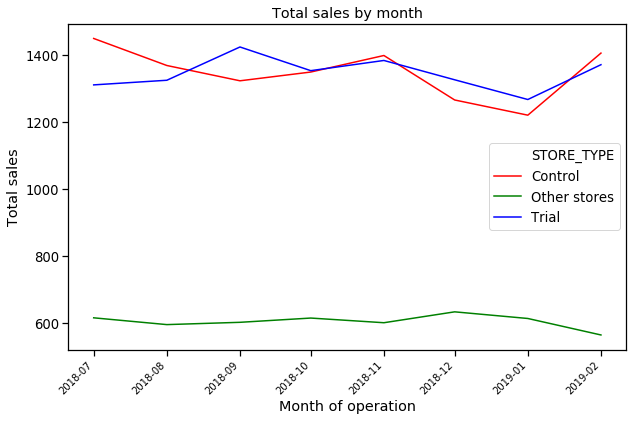

In [204]:
#Plot total sales by month 
plt.figure(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 
salesPlot = sns.lineplot(x = 'TRANSACTION_MONTH',
                         y = 'TOT_SALES', 
                         data = pastSales,
                         hue = 'STORE_TYPE',
                         palette = ['red','green','blue'])

salesPlot.set(xlabel = 'Month of operation', 
              ylabel = 'Total sales',
              title = 'Total sales by month')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

salesPlot

Great, the trial and control stores have similar total sales.
<br><br>Next, number of customers.

#### Conduct visual checks on customer count trends by comparing the trial store to the control store and other stores.

In [205]:
#Tabulate number of customers of each store over time 
measureOverTimeCusts = measureOverTime[['STORE_NBR','N_CUSTOMERS','YEARMONTH']]

#Categorise each store into Trial, Control and Other
measureOverTimeCusts = measureOverTimeCusts.assign(STORE_TYPE = measureOverTimeCusts.apply(lambda row: categoriseStoreType(row, controlStore, trialStore), axis = 1))

#Filter months to the period before trial
pastNCusts = measureOverTimeCusts[measureOverTimeCusts['YEARMONTH'] < pd.Timestamp(2019,3,1)].rename(columns = {'YEARMONTH':'TRANSACTION_MONTH'})

#Find the mean of all store types' monthly number of customers
pastNCusts = pastNCusts.groupby(['STORE_TYPE','TRANSACTION_MONTH']).mean()['N_CUSTOMERS'].reset_index()

pastNCusts

,STORE_TYPE,TRANSACTION_MONTH,N_CUSTOMERS
0,Control,2018-07-01,128.000000
1,Control,2018-08-01,135.000000
2,Control,2018-09-01,126.000000
3,Control,2018-10-01,123.000000
4,Control,2018-11-01,132.000000
5,Control,2018-12-01,124.000000
6,Control,2019-01-01,117.000000
7,Control,2019-02-01,126.000000
8,Other stores,2018-07-01,70.162879
9,Other stores,2018-08-01,70.697318


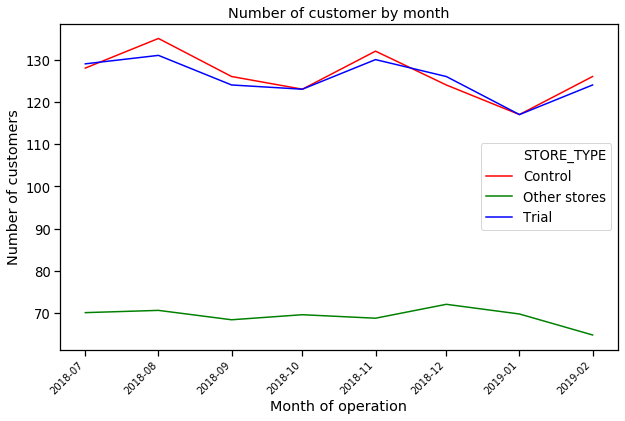

In [206]:
#Plot number of customer over month 
plt.figure(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 
custsPlot = sns.lineplot(x = 'TRANSACTION_MONTH',
                         y = 'N_CUSTOMERS',
                         data = pastNCusts, 
                         hue = 'STORE_TYPE',
                         palette = ['red','green','blue'])

custsPlot.set(xlabel = 'Month of operation',
              ylabel = 'Number of customers',
              title = 'Number of customer by month')

plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

custsPlot


Total number of customers of the control and trial stores are also similar.
<br><br>
Let's now assess the impact of the trial on sales.

## Assessment of trial

#### Scale pre-trial control sales to match pre-trial trial store sales

In [207]:
#Calculate the scaling factor for control sales
preTrialMeasures = preTrialMeasures.reset_index() 
scalingFactorControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trialStore) & (preTrialMeasures['YEARMONTH'] < pd.Timestamp(2019,3,1))]['TOT_SALES'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == controlStore) & (preTrialMeasures['YEARMONTH'] < pd.Timestamp(2019,3,1))]['TOT_SALES'].sum()
           
scalingFactorControlSales

1.0015583306649594

#### Apply the scaling factor


In [208]:
#Calculate and tabulate the pre trial control store's sales 
scaledControlSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == controlStore)]

scaledControlSales = scaledControlSales.assign(CONTROL_SALES = scaledControlSales['TOT_SALES'] * scalingFactorControlSales)

scaledControlSales.rename(columns = {'STORE_NBR':'CTRL_STORE'}, inplace = True)

scaledControlSales

,CTRL_STORE,TOT_SALES,YEARMONTH,STORE_TYPE,CONTROL_SALES
2747,237,1448.4,2018-07-01,Control,1450.657086
2748,237,1367.8,2018-08-01,Control,1369.931485
2749,237,1322.2,2018-09-01,Control,1324.260425
2750,237,1348.3,2018-10-01,Control,1350.401097
2751,237,1397.6,2018-11-01,Control,1399.777923
2752,237,1265.0,2018-12-01,Control,1266.971288
2753,237,1219.7,2019-01-01,Control,1221.600696
2754,237,1404.8,2019-02-01,Control,1406.989143
2755,237,1208.2,2019-03-01,Control,1210.082775
2756,237,1204.6,2019-04-01,Control,1206.477165


#### Calculate the percentage difference between scaled control sales and trial sales

In [209]:
#Tabulate pre trial trial store's sales
trialSales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == trialStore)]

trialSales = trialSales.rename(columns = {'STORE_NBR':'TRIAL_STORE','TOT_SALES':'TRIAL_SALES'})

trialSales

,TRIAL_STORE,TRIAL_SALES,YEARMONTH,STORE_TYPE
1001,88,1310.00,2018-07-01,Trial
1002,88,1323.80,2018-08-01,Trial
1003,88,1423.00,2018-09-01,Trial
1004,88,1352.40,2018-10-01,Trial
1005,88,1382.80,2018-11-01,Trial
1006,88,1325.20,2018-12-01,Trial
1007,88,1266.40,2019-01-01,Trial
1008,88,1370.20,2019-02-01,Trial
1009,88,1477.20,2019-03-01,Trial
1010,88,1439.40,2019-04-01,Trial


In [210]:
#Calculate and tabulate the percentage difference of control and 
#trial sales
percentageDiff = pd.merge(trialSales, scaledControlSales, on = 'YEARMONTH')[['YEARMONTH','TRIAL_SALES','CONTROL_SALES']]

percentageDiff = percentageDiff.assign(PERCENTAGE_DIFF = percentageDiff.apply(lambda row: percentageDiffCalc(row), axis = 1))

percentageDiff


,YEARMONTH,TRIAL_SALES,CONTROL_SALES,PERCENTAGE_DIFF
0,2018-07-01,1310.00,1450.657086,0.096961
1,2018-08-01,1323.80,1369.931485,0.033674
2,2018-09-01,1423.00,1324.260425,0.074562
3,2018-10-01,1352.40,1350.401097,0.001480
4,2018-11-01,1382.80,1399.777923,0.012129
5,2018-12-01,1325.20,1266.971288,0.045959
6,2019-01-01,1266.40,1221.600696,0.036673
7,2019-02-01,1370.20,1406.989143,0.026147
8,2019-03-01,1477.20,1210.082775,0.220743
9,2019-04-01,1439.40,1206.477165,0.193060


Let's see if the difference is significant

$H_{0} : \ the\,\,sales\,\, in\,\, trial\,\, period\,\, is\,\, the\,\, same\,\, as\,\, the\,\, sales\,\, in\,\, pre-trial\,\, period$
<br><br>
Let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

#### Calculate the standard deviation of percentage differences during the pre-trial period.

In [211]:
#Calculate the standard deviation based on percentage difference in 
#the pre-trial period
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].std()

mean = percentageDiff[percentageDiff['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].mean()

#### Calculate the degrees of freedom

In [212]:
#Note that there are 8 months in the pre-trial period, so DOF = 8 - 1
degreesOfFreedom = 7

#### Calculate the t-values for the trial months.

In [213]:
#Create a column for tvalue of percentage difference
percentageDiff = percentageDiff.assign(tValue = percentageDiff.apply(lambda row: calcTValue(row, stdDev), axis = 1))

percentageDiff

,YEARMONTH,TRIAL_SALES,CONTROL_SALES,PERCENTAGE_DIFF,tValue
0,2018-07-01,1310.00,1450.657086,0.096961,2.897136
1,2018-08-01,1323.80,1369.931485,0.033674,1.006168
2,2018-09-01,1423.00,1324.260425,0.074562,2.227870
3,2018-10-01,1352.40,1350.401097,0.001480,0.044228
4,2018-11-01,1382.80,1399.777923,0.012129,0.362408
5,2018-12-01,1325.20,1266.971288,0.045959,1.373227
6,2019-01-01,1266.40,1221.600696,0.036673,1.095756
7,2019-02-01,1370.20,1406.989143,0.026147,0.781270
8,2019-03-01,1477.20,1210.082775,0.220743,6.595668
9,2019-04-01,1439.40,1206.477165,0.193060,5.768527


Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

#### Find 95th percentile of the control store.

In [214]:
#Calculate and tabulate the 95th percentile of the control store
#monthly sales
pastSalesControls95 = measureOverTimeSales[measureOverTimeSales['STORE_TYPE'] == 'Control']

pastSalesControls95 = pastSalesControls95.assign(TOT_SALES = pastSalesControls95['TOT_SALES'] * (1 + stdDev * 2)) 

pastSalesControls95['STORE_TYPE'] = 'Control 95th % confidence interval'


#### Find 5th percentile of the control store.

In [215]:
#Calculate and tabulate the 5th percentile of the control store
#monthly sales
pastSalesControls5 = measureOverTimeSales[measureOverTimeSales['STORE_TYPE'] == 'Control']

pastSalesControls5 = pastSalesControls5.assign(TOT_SALES = pastSalesControls5['TOT_SALES'] * (1 - stdDev * 2))

pastSalesControls5['STORE_TYPE'] = 'Control 5th % confidence interval'


#### Plot everything into one graph.

In [216]:
#Find the actual monthly total sales of trial and control stores 
trialAssessment = measureOverTimeSales[(measureOverTimeSales['STORE_TYPE'] == 'Control') | (measureOverTimeSales['STORE_TYPE'] == 'Trial')]

#Merge 5th and 95th percentile data to form the confidence interval
#data
controlConfidence = pd.concat([pastSalesControls95,pastSalesControls5])

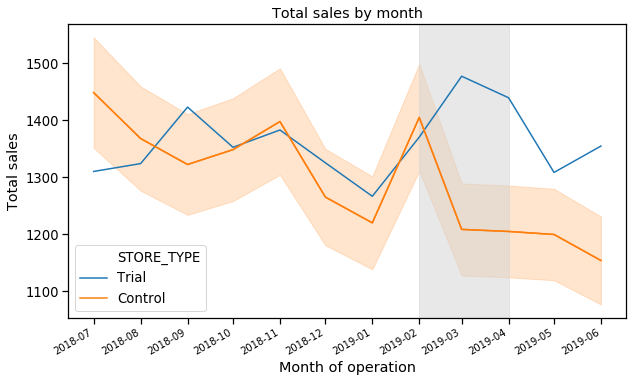

In [217]:
#Plot total sales by month of trial and control store 
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2)
trialPlot = sns.lineplot(data = trialAssessment,
                         x = 'YEARMONTH',
                         y = 'TOT_SALES',
                         hue = 'STORE_TYPE',
                         ax = ax)

confidencePlot = sns.lineplot(data = controlConfidence,
                              x = 'YEARMONTH',
                              y = 'TOT_SALES',
                              ax = ax)

trialPlot.set(xlabel = 'Month of operation', 
              ylabel = 'Total sales',
              title = 'Total sales by month') 

trialPlot.xaxis.set_major_locator(dates.MonthLocator())

plt.xticks(rotation = 45, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 10.0)

ax.axvspan(*dates.datestr2num(['2/1/2019', '4/1/2019']), color = 'lightgrey', alpha = 0.5)
fig.autofmt_xdate()

trialPlot

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's have a look at assessing this for number of customers as well.

In [218]:
#Calculate the scaling factor for control store's number of customer
scalingFactorControlCusts = pastNCusts[(pastNCusts['STORE_TYPE'] == 'Trial')]['N_CUSTOMERS'].sum() / pastNCusts[(pastNCusts['STORE_TYPE'] == 'Control')]['N_CUSTOMERS'].sum()

scalingFactorControlCusts

0.9930761622156281

#### Apply the scaling factor

In [219]:
#Calculate and tabulate the pre trial control store's number of 
#customers
scaledControlCusts = measureOverTimeCusts[(measureOverTimeCusts['STORE_NBR'] == controlStore)]

scaledControlCusts = scaledControlCusts.assign(CONTROL_NCUSTS = scaledControlCusts['N_CUSTOMERS'] * scalingFactorControlCusts) 

scaledControlCusts.rename(columns = {'STORE_NBR':'CTRL_STORE'}, inplace = True)

scaledControlCusts

,CTRL_STORE,N_CUSTOMERS,YEARMONTH,STORE_TYPE,CONTROL_NCUSTS
2747,237,128,2018-07-01,Control,127.113749
2748,237,135,2018-08-01,Control,134.065282
2749,237,126,2018-09-01,Control,125.127596
2750,237,123,2018-10-01,Control,122.148368
2751,237,132,2018-11-01,Control,131.086053
2752,237,124,2018-12-01,Control,123.141444
2753,237,117,2019-01-01,Control,116.189911
2754,237,126,2019-02-01,Control,125.127596
2755,237,119,2019-03-01,Control,118.176063
2756,237,120,2019-04-01,Control,119.169139


#### Calculate the percentage difference between scaled control sales and trial sales

In [220]:
#Tabulate pre trial trial store's number of customers
trialNCusts = measureOverTimeCusts[(measureOverTimeCusts['STORE_NBR'] == trialStore)]

trialNCusts = trialNCusts.rename(columns = {'N_CUSTOMERS':'TRIAL_NCUSTS'})

trialNCusts

,STORE_NBR,TRIAL_NCUSTS,YEARMONTH,STORE_TYPE
1001,88,129,2018-07-01,Trial
1002,88,131,2018-08-01,Trial
1003,88,124,2018-09-01,Trial
1004,88,123,2018-10-01,Trial
1005,88,130,2018-11-01,Trial
1006,88,126,2018-12-01,Trial
1007,88,117,2019-01-01,Trial
1008,88,124,2019-02-01,Trial
1009,88,134,2019-03-01,Trial
1010,88,128,2019-04-01,Trial


In [221]:
#Calculate and tabulate the percentage difference of control and 
#trial number of customers
percentageDiffCusts = pd.merge(trialNCusts, scaledControlCusts, on = 'YEARMONTH')[['YEARMONTH','TRIAL_NCUSTS','CONTROL_NCUSTS']]

percentageDiffCusts = percentageDiffCusts.assign(PERCENTAGE_DIFF = percentageDiffCusts.apply(lambda row: percentageDiffCustsCalc(row), axis = 1))

percentageDiffCusts

,YEARMONTH,TRIAL_NCUSTS,CONTROL_NCUSTS,PERCENTAGE_DIFF
0,2018-07-01,129,127.113749,0.014839
1,2018-08-01,131,134.065282,0.022864
2,2018-09-01,124,125.127596,0.009012
3,2018-10-01,123,122.148368,0.006972
4,2018-11-01,130,131.086053,0.008285
5,2018-12-01,126,123.141444,0.023214
6,2019-01-01,117,116.189911,0.006972
7,2019-02-01,124,125.127596,0.009012
8,2019-03-01,134,118.176063,0.133901
9,2019-04-01,128,119.169139,0.074104


Let's see if the difference is significant.

$H_{0} : \ the\,\,number\,\,of\,\,customers\,\, in\,\, trial\,\, period\,\, is\,\, the\,\, same\,\, as\,\, the\,\, number\,\,of\,\,customers\,\, in\,\, pre-trial\,\, period$

#### Calculate the standard deviation based on the scaled percentage difference in the pre-trial period.

In [222]:
#Calculate the standard deviation based on percentage difference in
#the pre-trial period
stdDev = percentageDiffCusts[percentageDiffCusts['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].std()

mean = percentageDiffCusts[percentageDiffCusts['YEARMONTH'] < pd.Timestamp(2019,2,1)]['PERCENTAGE_DIFF'].mean()

#### Calculate the degrees of freedom

In [223]:
#Note that there are 8 months in the pre-trial period, so DOF = 8 - 1
degreesOfFreedom = 7

We will test with a null hypothesis of there being 0 difference between trial and control stores

In [224]:
#Calculate the t value of each row
percentageDiffCusts = percentageDiffCusts.assign(tValue = percentageDiffCusts.apply(lambda row: calcTValue(row, stdDev), axis = 1))

percentageDiffCusts

,YEARMONTH,TRIAL_NCUSTS,CONTROL_NCUSTS,PERCENTAGE_DIFF,tValue
0,2018-07-01,129,127.113749,0.014839,2.045982
1,2018-08-01,131,134.065282,0.022864,3.152454
2,2018-09-01,124,125.127596,0.009012,1.242497
3,2018-10-01,123,122.148368,0.006972,0.961300
4,2018-11-01,130,131.086053,0.008285,1.142324
5,2018-12-01,126,123.141444,0.023214,3.200642
6,2019-01-01,117,116.189911,0.006972,0.961300
7,2019-02-01,124,125.127596,0.009012,1.242497
8,2019-03-01,134,118.176063,0.133901,18.462041
9,2019-04-01,128,119.169139,0.074104,10.217248


#### Find 95th percentile of the control store.

In [225]:
#Calculate and tabulate the 95th percentile of the control store 
#monthly number of customers
pastCustsControl95 = measureOverTimeCusts[measureOverTimeCusts['STORE_TYPE'] == 'Control']

pastCustsControl95 = pastCustsControl95.assign(N_CUSTOMERS = pastCustsControl95['N_CUSTOMERS'] * (1 + stdDev * 2))

pastCustsControl95['STORE_TYPE'] = 'Control 95th % confidence interval'


#### Find 5th percentile of the control store.

In [226]:
#Calculate and tabulate the 5th percentile of the control store
#monthly number of customers
pastCustsControl5 = measureOverTimeCusts[measureOverTimeCusts['STORE_TYPE'] == 'Control']

pastCustsControl5 = pastCustsControl5.assign(N_CUSTOMERS = pastCustsControl5['N_CUSTOMERS'] * (1 - stdDev * 2)) 

pastCustsControl5['STORE_TYPE'] = 'Control 5th % confidence interval'


#### Plot everything into one graph.

In [227]:
#Find the actual monthly number of customers of trial and control 
#stores
trialAssessment = measureOverTimeCusts[(measureOverTimeCusts['STORE_TYPE'] == 'Control') | (measureOverTimeCusts['STORE_TYPE'] == 'Trial')]

#Merge 5th and 95th percentile data to form the confidence interval 
#data
controlConfidence = pd.concat([pastCustsControl95,pastCustsControl5])

In [ ]:
#Plot number of customers by month of trial and control store 
fig, ax = plt.subplots(figsize = (10,6))

sns.set_context('notebook',font_scale = 1.2) 

trialPlot = sns.lineplot(data = trialAssessment,
                         x = 'YEARMONTH',
                         y = 'N_CUSTOMERS',
                         hue = 'STORE_TYPE',
                         ax = ax)

confidencePlot = sns.lineplot(data = controlConfidence,
                              x = 'YEARMONTH',
                              y = 'N_CUSTOMERS',
                              ax = ax)

trialPlot.set(xlabel = 'Month of operation',
              ylabel = 'Number of customers',
              title = 'Number of customers by month')

trialPlot.xaxis.set_major_locator(dates.MonthLocator()) 
plt.xticks(rotation = 45,
           horizontalalignment = 'right', 
           fontweight = 'light',
           fontsize = 10.0)

ax.axvspan(*dates.datestr2num(['2/1/2019', '4/1/2019']), color = 'lightgrey', alpha = 0.5)
fig.autofmt_xdate()
plt.savefig('trial88_custs.png',bbox_inches = 'tight', dpi=300)
trialPlot


Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

## Conclusion

We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that we have finished our analysis, we can prepare our presentation to the Category Manager.